In [2]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## A/B Testing

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [3]:
baby = Table.read_table('baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [5]:
smoking_and_birthweight = baby.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


In [6]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


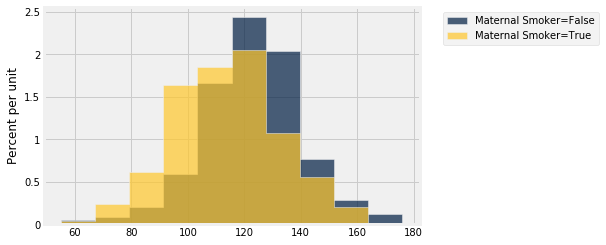

In [8]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')


In [9]:
means_tbl = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_tbl

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [10]:
means = means_tbl.column(1)
observed_difference = means.item(0) - means.item(1)
observed_difference

9.266142572024918

In [11]:
weights = smoking_and_birthweight.select('Birth Weight')
weights

Birth Weight
120
113
128
108
136
138
132
120
143
140


In [12]:
weights.sample(with_replacement=False)

Birth Weight
143
110
116
132
133
126
134
123
164
126


In [14]:
shuffled_weights = weights.sample(with_replacement=False).column(0)
shuffled_weights

array([123, 115, 132, ..., 120, 137, 115])

In [12]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Birth Weight', shuffled_weights
)

In [13]:
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Birth Weight
False,120,97
False,113,117
True,128,117
True,108,127
False,136,117
False,138,124
False,132,112
False,120,116
True,143,123
False,140,80


In [14]:
original_and_shuffled.group('Maternal Smoker', np.average)

Maternal Smoker,Birth Weight average,Shuffled Birth Weight average
False,123.085,119.628
True,113.819,119.205


In [16]:
group_labels = baby.select('Maternal Smoker')
group_labels

Maternal Smoker
False
False
True
True
False
False
False
False
True
False


In [17]:
# array of shuffled weights

# table with shuffled weights assigned to group labels

# array of means of the two groups

# difference between means of the two groups

In [30]:
shuffled_weights = weights.sample(with_replacement=False).column(0)
shuffled_tbl = group_labels.with_column('Shuffled Weight', shuffled_weights)
means = shuffled_tbl.group('Maternal Smoker', np.average).column(1)
new_difference = means.item(0) - means.item(1)
new_difference


-0.03470908176791454

In [25]:
differences = make_array()

for i in np.arange(5000):
    shuffled_weights = weights.sample(with_replacement = False).column(0)
    shuffled_tbl = group_labels.with_column('Shuffled Weight', shuffled_weights)
    means = shuffled_tbl.group('Maternal Smoker', np.average).column(1)
    new_difference = means.item(0) - means.item(1)
    differences = np.append(differences, new_difference)
    

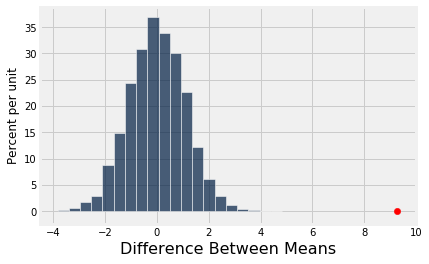

In [31]:
Table().with_column('Difference Between Means', differences).hist(bins=20, ec='w')
plots.scatter(observed_difference, 0, color='red', s=40);

In [26]:
observed_difference

9.266142572024918

In [34]:
np.count_nonzero(differences >= observed_difference) / 5000

0.0

In [4]:
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


## Question: Is there an assocaiton between maternal smoker and gastational days?
#### Ho: Assication of maternal smoker and gastational days are due to chance
#### Ha: no it's not due to chance

In [7]:
smoker_and_days = baby.select('Maternal Smoker', 'Gestational Days')
smoker_and_days

Maternal Smoker,Gestational Days
False,284
False,282
True,279
True,282
False,286
False,244
False,245
False,289
True,299
False,351


In [26]:
# observed difference
observed_mean_tbl = smoker_and_days.group('Maternal Smoker', np.average)
# observed_mean_tbl
observed_mean_diff = observed_mean_tbl.column(1).item(0)-observed_mean_tbl.column(1).item(1)
observed_mean_diff

1.9765223882870941

In [28]:
# emperical difference
sample_size = 100000 #sample 100000 times
smoker_condition = baby.select('Maternal Smoker')
gest_day = baby.select('Gestational Days')

emperical_diffs = make_array()


for i in np.arange(sample_size):
    #get the shuffled gestational days in an array
    emperical_gest_day = gest_day.sample(with_replacement = False).column(0) 
    #get the emperial data with smoker condition
    emperical_tbl = smoker_condition.with_column('Shuffled Gestational Days', emperical_gest_day)
    #get emperical mean in a table
    emperical_mean_tbl = emperical_tbl.group('Maternal Smoker', np.average)
    #get emperical difference
    emperical_diff = emperical_mean_tbl.column(1).item(0)-emperical_mean_tbl.column(1).item(1)
    #collect each emperical differnece in an array
    emperical_diffs = np.append(emperical_diffs, emperical_diff)


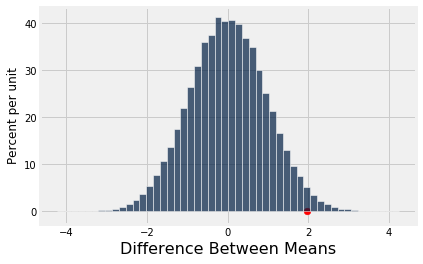

In [33]:
Table().with_column('Difference Between Means', emperical_diffs).hist(bins=50, ec='w')
plots.scatter(observed_mean_diff, 0, color='red', s=45);

In [43]:
# p-value
percent_5 = 0.05
percent_1 = 0.01
p_value = np.count_nonzero(emperical_diffs >= observed_mean_diff) / sample_size
p_value > percent_5

False

## Deflategate

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [27]:
football = Table.read_table('deflategate.csv')
football.show()

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [28]:
football = football.drop(1, 2).with_column(
    'Combined', (football.column(1) + football.column(2)) / 2
)

In [29]:
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [30]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [31]:
start = np.append(12.5 * np.ones(11), 13 * np.ones(4))
start

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [32]:
drops = start - football.column(1)
drops

array([0.85 , 1.475, 1.175, 1.65 , 1.225, 0.725, 0.425, 1.175, 1.35 ,
       1.8  , 1.375, 0.475, 0.475, 0.275, 0.65 ])

In [33]:
football = football.select('Team').with_column(
    'Drop', drops
)

In [34]:
football.show()

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


In [35]:
means_tbl = football.group('Team', np.average)

In [36]:
means_tbl

Team,Drop average
Colts,0.46875
Patriots,1.20227


In [37]:
means = means_tbl.column(1)
observed_difference = means.item(0) - means.item(1)

In [38]:
observed_difference

-0.733522727272728

In [39]:
group_labels = football.select('Team')
drop_tbl = football.select('Drop')

In [40]:
shuffled_drops = drop_tbl.sample(with_replacement=False).column(0)
shuffled_tbl = group_labels.with_column('Shuffled Drop', shuffled_drops)
means = shuffled_tbl.group('Team', np.average).column(1)
new_difference = means.item(0) - means.item(1)
new_difference

0.19545454545454577

In [41]:
differences = make_array()

for i in np.arange(20000):
    shuffled_drops = drop_tbl.sample(with_replacement=False).column(0)
    shuffled_tbl = group_labels.with_column('Shuffled Drop', shuffled_drops)
    means = shuffled_tbl.group('Team', np.average).column(1)
    new_difference = means.item(0) - means.item(1)
    differences = np.append(differences, new_difference)
    

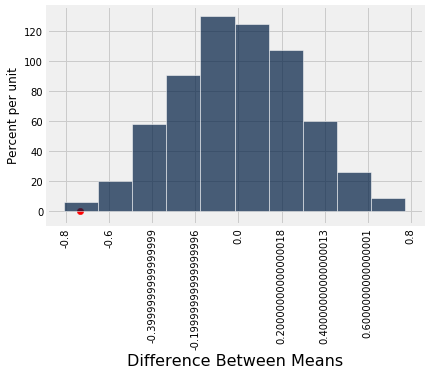

In [42]:
Table().with_column('Difference Between Means', differences).hist(ec='w')
plots.scatter(observed_difference, 0, color='red', s=40);

In [43]:
np.count_nonzero(differences <= observed_difference) / 20000

0.0026